<a href="https://colab.research.google.com/github/anisbagwan/Mobile-Price-Range-Prediction-Capstone-Project/blob/main/Mobile_Price_Range_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# DATA DEFINITION -

* Battery_power - Total energy a battery can store in one time measured in mAh

* Blue - Has bluetooth or not

* Clock_speed - speed at which microprocessor executes instructions

* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory in Gigabytes
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores of processor
* Pc - Primary Camera mega pixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in Mega Bytes
* Sc_h - Screen Height of mobile in cm
* Sc_w - Screen Width of mobile in cm
* Talk_time - longest time that a single battery charge will last when you are

* Three_g - Has 3G or not

* Touch_screen - Has touch screen or not

* Wifi - Has wifi or not

* Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

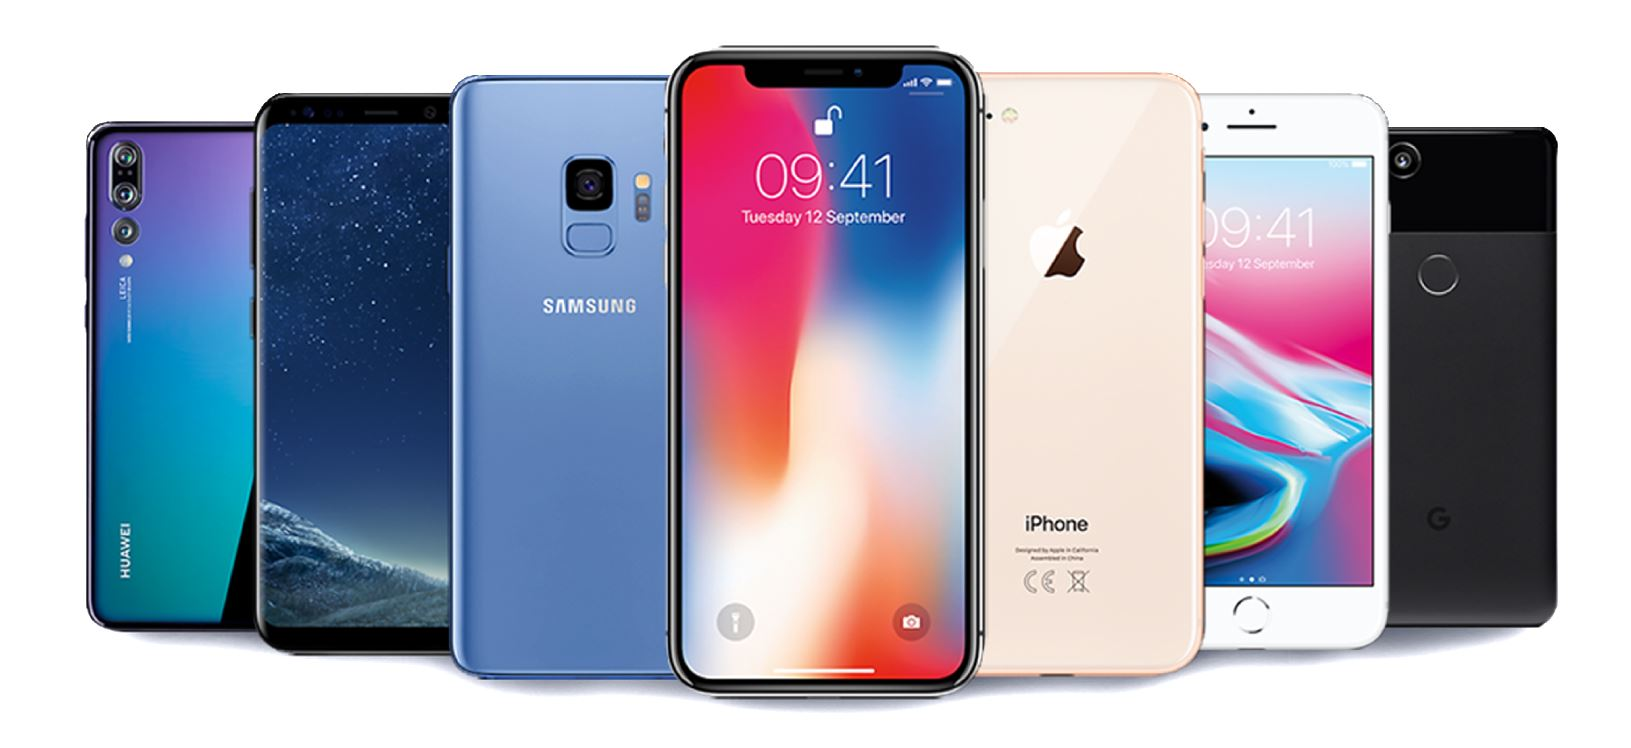

###   “The moment you make a mistake in pricing, you're eating into your reputation or your profits.”   
                                                               - Katharine Paine (founder and CEO of KDPaine & Partners LLC)


We are in an era of mobile phone revolution, where the changes in a span of less than a decade have been so dramatic that many have come to realise that they can’t think of a life without a mobile phone. The dependibility of people on their phone created a huge demand in the phone market, due to which many new players (phone Brands) entered the market. Today, phone market is considered as a highly competitive market and one has to do adequate research before entering or launching their new product.Harvard studies have found that a 1% improvement in your pricing can add up to 11% to your profits. With bad pricing, you’re missing out on profits in every transaction that you make, not to mention the deals that you completely miss out on. Pricing is also a big factor in your branding and reputation. Prices that are too high can make you come off as arrogant, while prices that are too low can call the quality of your product into question.

We have been provided a dataset with name ***"data_mobile_price_range"***, which we have to analyse in order to identify the factors which drives the phone price. For this, we will perform exploratory data analysis in the provided data and will try to draw some useful insights and correlations between price range and phone features. 
Further, we will create a Supervised ML classification model which would help the company to predict/decide the pricing of a phone depending on the given phone features.

To achieve above objective, we have divided the task into following steps :
    
    1.  Understand The Data    
    2.  Data Cleaning- Getting Data Ready to Analyse
    4.  Discovering Information - Analysis
    5.  Feature Engineering 
    6.  Model Fitting
    7.  Hyperparameter Tuning
    8.  Cross Validation
    9.  Conclusion
    
Let's start with **importing important libraries** which will be useful in the excercise.

In [ ]:
# Importing important Libraries

import pandas as pd                     # To bring data analysis tools and libraries
import numpy as np                      # To perform numerical/mathematical operation on array
import matplotlib.pyplot as plt         # For plotting data
import seaborn as sns                   # For statistical graphics

import warnings
warnings.filterwarnings("ignore")

It's time to mount our google drive with the notebook and import our mine - **"data_mobile_price_range"** dataset.

In [ ]:
# Mount the google drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset

df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/ML Capsotne Classification/Copy of data_mobile_price_range.csv')

We have imported our dataset and it is time to understand the data. Launching first step of our task.....

# 1. Understanding The Data

Understanding new data is like understanding a new person. You first interact , observe their personality and then assess them. We are going to follow same with our dataset.
 
   * The First Interaction : We will explore top and bottom few rows of our data 
   * Observe the Features : Then we will check all the variables and their definition
   * Assessing : After that we will see size data , information of variables and statistical description of numerical variables
   
It's time for the action : **The First Interaction !**

In [ ]:
# Display top 5 rows 

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Display bottom 5 rows 

df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


The data seems interesting from the first look. We understood there are good number of variables and it seems all or most of them have numerical values in them. Let us have a close look on our variables.
Initiating second step of data exploration : **Observe the Features**

In [ ]:
# Display shape of data
print(f'Our dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

#Display column names
print(f'Our dataset has following columns - {list(df.columns)}')

Our dataset has 2000 rows and 21 columns.
Our dataset has following columns - ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


We have been also provided a document which gives definitions of the above 21 variables. Let us take a look on their **definitions** :

* Battery_power - Total energy a battery can store in one time measured in mAh

* Blue - Has bluetooth or not

* Clock_speed - speed at which microprocessor executes instructions

* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory in Gigabytes
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores of processor
* Pc - Primary Camera mega pixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in Mega Bytes
* Sc_h - Screen Height of mobile in cm
* Sc_w - Screen Width of mobile in cm
* Talk_time - longest time that a single battery charge will last

* Three_g - Has 3G or not

* Touch_screen - Has touch screen or not

* Wifi - Has wifi or not

* Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

Let us move ahead and execute third step of our data exporation : **Assessing the Data**

In [ ]:
# Display information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

All numerical values !! That is nice . Just two variables are of float type and rest 19 are of int type. Let us take a look on their **statistical description and number of unique values** they have.

In [ ]:
# Display statistical data of all columns with numerical values
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# Display number of unique values for each column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### What We Understood !
We have explored our dataset which consists of **2000 rows and 21 columns**. On going through all varibales, we identified **'price_range' as our dependent variable**. On taking a look of all unique values we found that our variables have three types of data- continous,discrete and binary type. Variables like 'blue', 'dual_sim','four_g','three_g','touch_screen','wifi' have **binary values.**

#  2. Data Cleaning - Making Data Ready To Analyse
Our next task is to clean our data and get it ready for the analysation part. For data cleaning we will look for **duplicate values, Null/Missing values and Outliers** and will try to eliminate them if and when required.

In [ ]:
 # Display null values numbers in each column
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

None of the columns have null value in it !!

In [ ]:
# Checking for duplicates
check_dupl = df.duplicated(keep = False).any()
if check_dupl == False:
    print('There are no duplicate rows in our data')
else:
    print ('There are duplicate rows in our data')

There are no duplicate rows in our data


That's great !! Looks like we have got a cleaned data. It's time to look for **Outliers -**

### Checking For Outliers !!

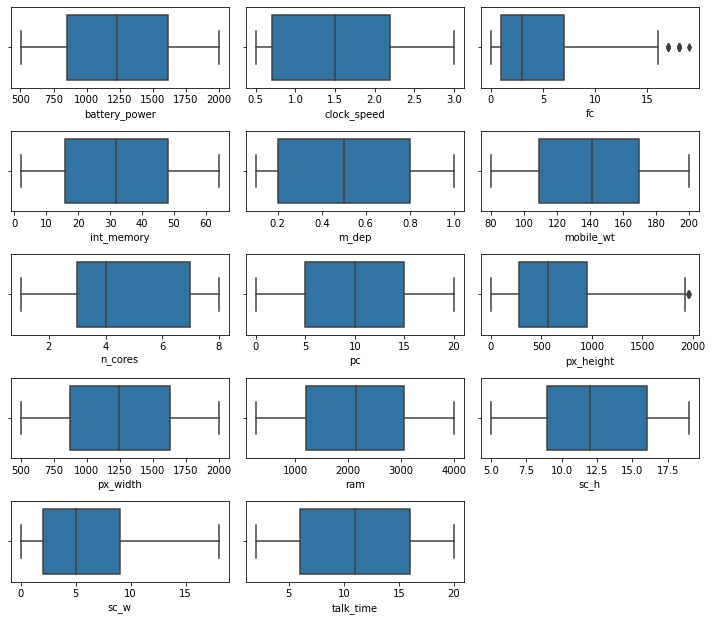

In [ ]:
#Create figure object
fig = plt.subplots(figsize=(10,10))

# Create boxplot for each numerical variable
for i,j in enumerate(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc','px_height','px_width','ram', 'sc_h','sc_w','talk_time']):
    plt.subplot(6,3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(df[j])
    plt.tight_layout()

Only 'fc' variable (which tells about front camera megapixel) and px_height variable (which tells about pixels heights) , have very very few countable outliers and their values also lies in an acceptable range. Hence, it is better to leave those outliers unattended.

We have made our data ready to analayse....or have we ?? Well, our data has been cleaned but still there are some scope to make our data easy to analyse. Let's start doing feature engineering.

# 3. Feature Engineering
On carefully looking all the variables we found two pairs of variables which can be replaced by new variables.
#### 1. Deriving new variable from sc_h and sc_w

Both sc_h and sc_w variables tells about the screen dimensions (screen height and width respectively). We use these information to derive a single variable , **sc_area** , which can replace these two.

In [ ]:
# Creating a new column which gives the screen area size of the mobiles
df['sc_area']=df['sc_w']*df['sc_h']
# Drop sc_h and sc_w variable
df.drop(['sc_w','sc_h'],inplace=True,axis=1)

#### 2. Deriving new variable from px_height and px_width
Both px_height and px_width variables talks about the pixels dimensions (pixel height and width respectively). We use these information to derive a new variable , **px_size** , which can replace these two.


In [ ]:
# Creating a new column which gives the pixel size of the mobiles
df['px_size']=df['px_width']*df['px_height']
# Drop px_width and px_height variable
df.drop(['px_width','px_height'],inplace=True,axis=1)

# 4. Discovering Information -  EDA

Now, we hope our data is ready to analyse. Our job is to identify the key factors which identify the price range of a phone. For this we will begin with univariate analysis, where we will be seeing the distribution of all price ranges in the given data. Then we will move to bivariate and multivariate analysis and will try to analyse the effects of features on the price range. This analysis will help to summarise the main characterstics of the feautres and also will help us to visualize their statistical graphics.

### Univariate Analysis
Let us first understand how how dependent variable is distributed across the data. Our dependent variable is 'price_range' which have four values. The price range value increase from 0 to 3. So, phone which comes in the price range of 0 is among the cheapest, while those which are coming in the range of 3, are the most expensive. So, O being the low cost range, 1 being the medium cost range, 2 being the high cost range and 3 is the very high cost range.

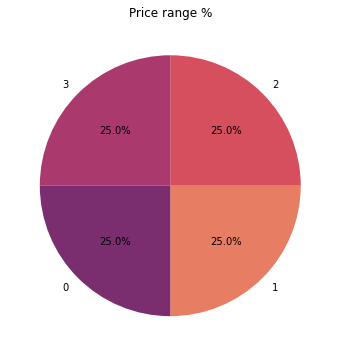

In [ ]:
#Creating list of Price range
a=df['price_range'].unique()
#Creating list of individual price range count
b=df['price_range'].value_counts()
# Plotting a Pie chart
plt.figure(figsize=(10,6))
#explode=[0.1,0.1,0.1,0.1]
plt.pie(b, labels=a,colors=sns.color_palette("flare",4), 
        autopct="%.1f%%",shadow=False,startangle=270)
plt.title('Price range %')
# displaying chart
plt.show()

Dataset has its data divided into equal portions of all four price ranges.

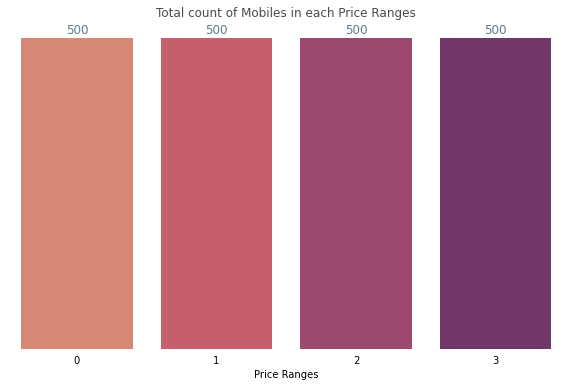

In [ ]:
# Let's check the total count of each class
plt.figure(figsize=(10,6))


# Plotting the values in dependent variable
ax=sns.countplot(df['price_range'],palette='flare')

# make one bar, the python bar, a contrasting color
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12,color='#607B8B', 
                   xytext=(0, 8),
                   textcoords='offset points')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="Price Ranges", ylabel = "")
plt.title('Total count of Mobiles in each Price Ranges',alpha=0.7)


plt.show()

The dataset have equal amount of mobile phones is each price range.



### Bivariate and Multivariate Analysis

Let's jump to the multivariate analysis where will be comparing our dependedent variable with two or more independent variables. There are 20 independent variables and we could do analysis on each variable with respect to our independent variable. However, the smarter way will be to first plot a correlation map in order to identify the right featues which shows some correlation with our independent variable and then analyse them. After identifying the right variables for analysis, we will start comparing dependent variable with our *binary variables* first. Later, we will compare with other variables.

#### Finding Correlation
As mentioned earlier, the objective of plotting correlation map is to have a look on variables showing some linearity with our dependent variable. Further we will be seeing independent variables which shows correlation with another independent variables.
However, one should keep in mind that multi-collinearity doesn't create problems in prediction capability but in the Interpretability.

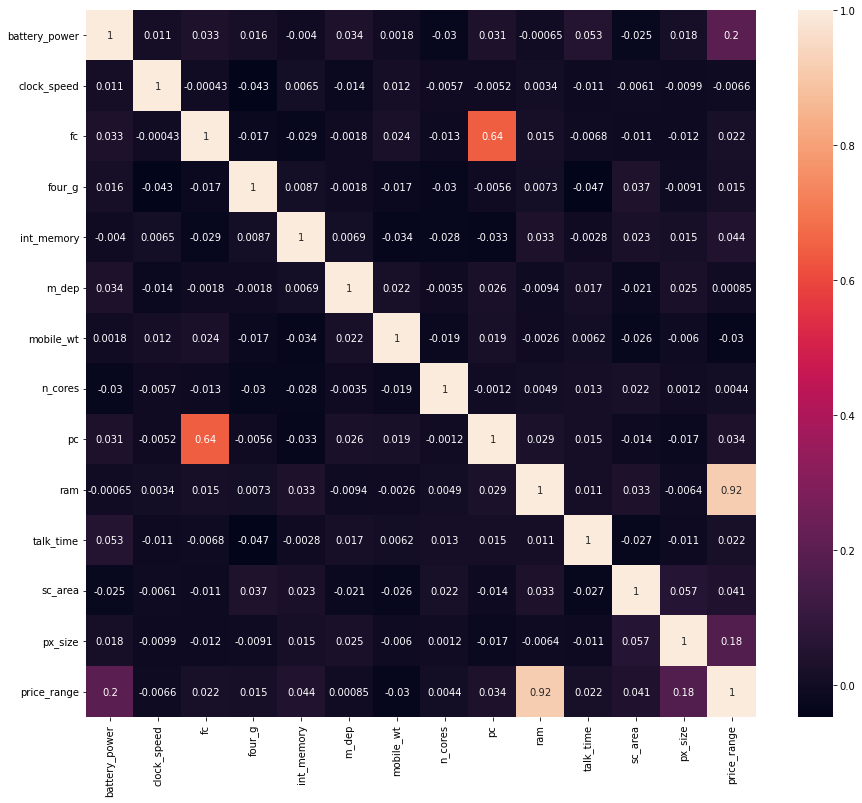

In [ ]:
# create list of variable other than binary variable 
continous_df = df[['battery_power','clock_speed','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc', 'ram', 'talk_time','sc_area', 'px_size','price_range']]
# Plot correlation map
plt.figure(figsize=(15,13))
sns.heatmap(continous_df.corr(),annot=True)

Variables like clock_speed,m_dep,n_cores shows minimal correlation with dependent variable , hence we will not be doing bivariate analysis with those variables. Let us move ahead and define a function to plot our binary variables

In [ ]:
# Creating a function to plot binary variables

def count_plot(hue,xlabel,title):
  # Let's check the dependent variable first...
  plt.figure(figsize=(10,6))
  plt.grid(b=False,axis='both')
  # Plotting the values in dependent variable
  ax=sns.countplot(x='price_range',hue=hue,data=df, palette='flare')

  # make one bar, the python bar, a contrasting color
  for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12,color='#607B8B', 
                     xytext=(0, 8),
                     textcoords='offset points')

  # Removing all ticks and label
  plt.tick_params(top=False, bottom=False, left=False, right=False, 
                  labelleft=False, labelbottom=True)

  # remove the frame of the chart
  for spine in plt.gca().spines.values():
      spine.set_visible(False)

  ax.set(xlabel=xlabel, ylabel = "")
  plt.title(title,alpha=0.7)
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)


  plt.show()

#### a. Distribution of Price Range depending on Bluetooth availibility
How does the presence of a bluetooth varies for different price range ?? Let's find out !!

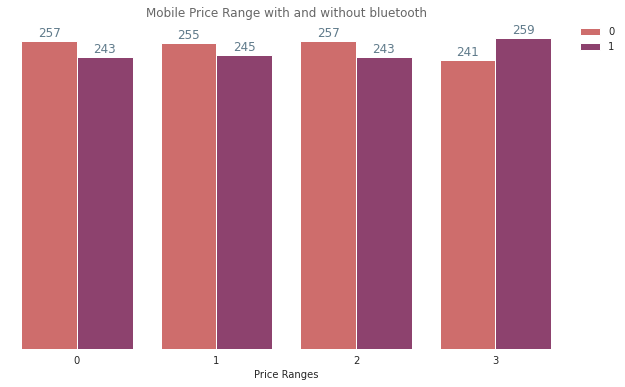

In [ ]:
count_plot('blue','Price Ranges','Mobile Price Range with and without bluetooth')

For low,medium and high cost ranges , the trend is almost same i.e the phones without bluetooth are more in number than the phones with bluetooth (although the difference is less). BUT for the most expensive price range (3), the number of phones without bluetooth are more.

#### b. Distribution of Mobile price ranges on the basis of 3g availibility
Does our phone brands emphasis 3g support feature in their phones ?? Let's find out !

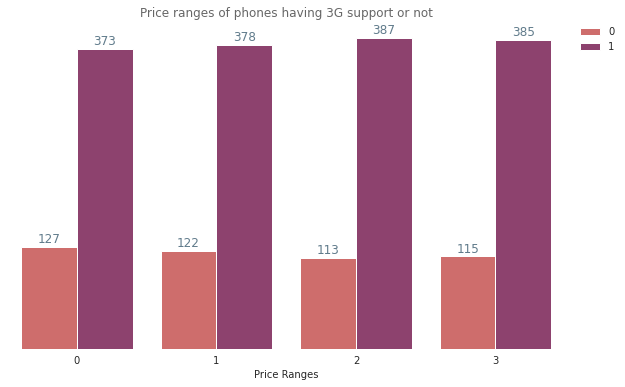

In [ ]:
# Plotting price ranges of phones having 3G support or not
count_plot('three_g','Price Ranges','Price ranges of phones having 3G support or not')

Here, all the four price ranges show same trend. The number of handsets with 3g support are more than those without having 3g suport.

#### c. Distribution of Mobile phones across different price ranges on the basis of 4g availibility
Does phone brands emphasis 4g support feature as much as they do for 3g support ? Time to find out !!

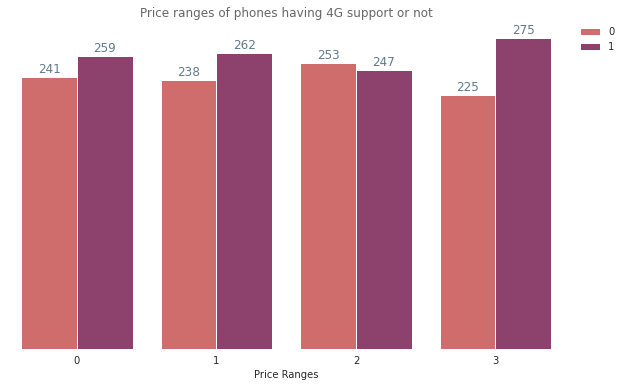

In [ ]:
count_plot('four_g','Price Ranges','Price ranges of phones having 4G support or not')

Low,medium and very high cost range phones have maximum handsets with 4g support. While for high cost category, the number of handsets without 4g support is more.

#### d. Distribution of Mobile phones across different price ranges on the basis of Wi-Fi availibility
Lets see the reaction of Wi-Fi support on price ranges.

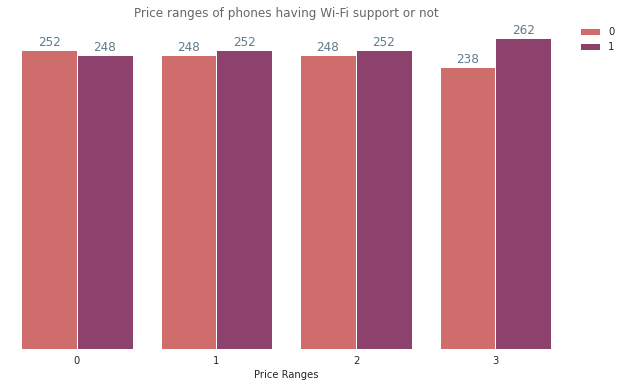

In [ ]:
count_plot('wifi','Price Ranges','Price ranges of phones having Wi-Fi support or not')

For low and medium price range handsets, majority of them are with wifi availibility. While for High and Very High price range mobiles, majority are not having Wifi. And the difference in numbers is much more in high price range handsets.

In [ ]:
# Creating a function to plot a line plot of numerical columns
def line_plot(y,title):

  plt.figure(figsize=(10,6))
  sns.set_style("whitegrid")

  sns.lineplot(data=df, x='price_range', y=y, 
              color='#8B3A62')
  # remove the frame of the chart
  for spine in plt.gca().spines.values():
      spine.set_visible(False)

  # Draw grid lines with red color and dashed style
  plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

  plt.title(title)

#### e. Internal Memory over different Price Range

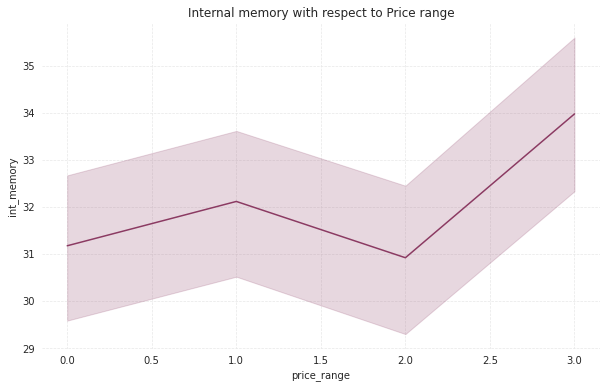

In [ ]:
# Plotting rented bike count with respect to hour
line_plot('int_memory','Internal memory with respect to Price range')

It was strange but interesting to find out that Internal memory for low and medium cost phones are similar or more to that of high cost phones. However, for very high cost category, the internal memories are much more compared to other three categories.

#### f. Front Camera Megapixels over different price range

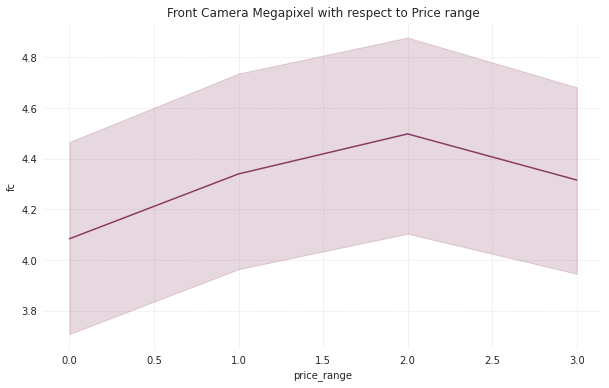

In [ ]:
# Plotting rented bike count with respect to hour
line_plot('fc','Front Camera Megapixel with respect to Price range')

The trends shows that , for upto high cost value phones, with increase in front camera megapixels , phone price also increases. However, Very high cost phones have their megapixels in an average range. 

#### g. Mobile Weight over different price range

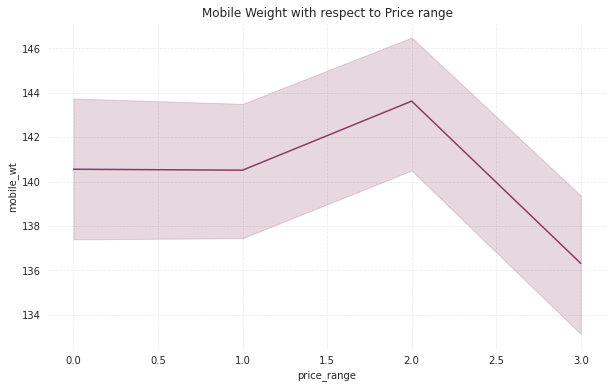

In [ ]:
line_plot('mobile_wt','Mobile Weight with respect to Price range')

Most expensive phones are the lightest one.

#### h. Pixel Size Over Different Price Range

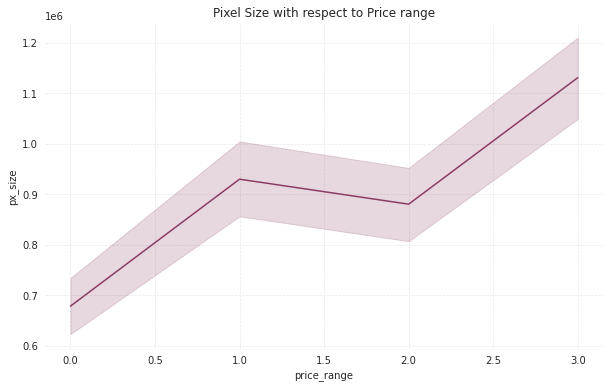

In [ ]:
line_plot('px_size','Pixel Size with respect to Price range')

In [ ]:
# Creating a function to plot barplot
def barplot(y_value,title):

  plt.figure(figsize=(10,6))
  sns.barplot(x="price_range", y=y_value, data=df,palette='flare')

  # remove the frame of the chart
  for spine in plt.gca().spines.values():
      spine.set_visible(False)
  # Draw grid lines with red color and dashed style
  plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)
  plt.title(title)

#### j. Battery Power over price ranges

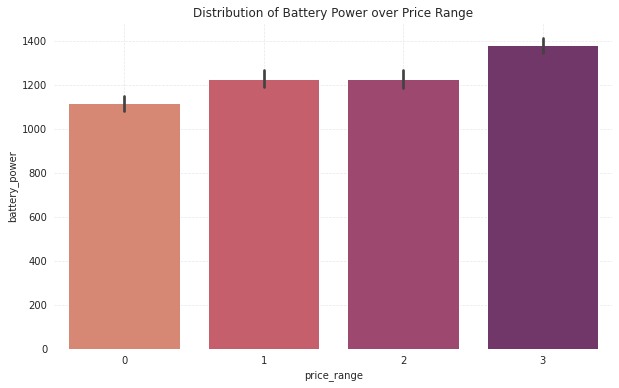

In [ ]:
# Plotting battery power of mobiles with Price range
barplot('battery_power','Distribution of Battery Power over Price Range')

More you pay, more you get !! Low cost phones comes with lower battery power while high battery power implies Very high phone cost.

#### k. Ram Over Different Price Range

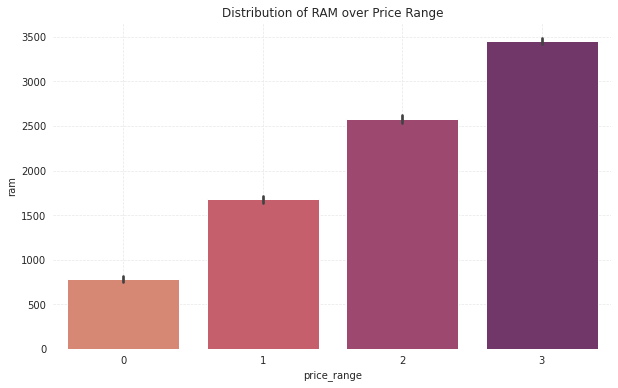

In [ ]:
#Plotting distribution of RAM over Price Range
barplot('ram','Distribution of RAM over Price Range')

The mobile phones having high RAM are of high price range and the phones having low RAM are of low price range.

#### l. Relation between Ram and Internal Memory for different Price Range

Text(0, 0.5, 'Internal Memory')

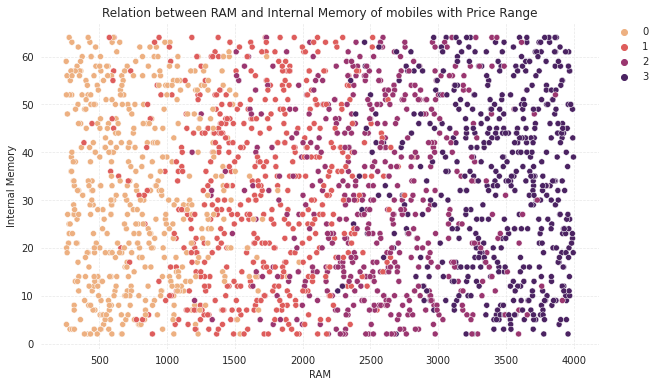

In [ ]:
# Plotting distribution of RAM and Internal Memory over Price Range
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

sns.scatterplot(data=df, x = df['ram'], y = 'int_memory', hue='price_range', 
            palette='flare')
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)
plt.title('Relation between RAM and Internal Memory of mobiles with Price Range')
plt.xlabel('RAM')
plt.ylabel('Internal Memory')

We have tried to draw useful insights from all variables. These insights are useful to identify the factors which drives mobile pricing. We are done with our first major task of analysation and our second task is to build a predictive model which can predict the price range of a given mobile on the basis of its features. For this task we will be first splitting of data into 5:1 ratio for training and testing respectively.

### Splitting Data for Training and Testing

We are first going to assign variables to our dependent and Independent variable values. After that we are going to split our total data into 4:1 train to test ratio. 

In [ ]:
X=df[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_size', 'ram', 'sc_area', 'talk_time']].values
y=df['price_range'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1) 

### Rescaling - Standardization
Before applying models, it is important to generalise our data. For this we will be using standardization method. Standardization gives all features the same influence on the distance metric. If one feature has very large values, it will dominate over other features when calculating the distance.

In [ ]:
# Rescaling independent variables
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

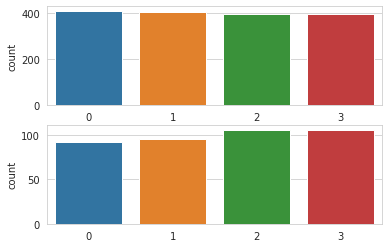

In [103]:
fig, ax =plt.subplots(2,1)
sns.countplot(y_train,ax=ax[0])
sns.countplot(y_test,ax=ax[1])
plt.show()

We have pre-processed our data and it is ready to be applied on classification model.A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data.The following are the steps involved in building a classification model:

* **Initialize** : It is to assign the classifier to be used for classification. Considering the requirement of **multiclass classification**, we are going to use four classifiers for this project : **Decision Tree, KNeighbors, Random Forest and Gausian Naive Bayes classifier**.

* **Train the classifier**: All classifiers in scikit-learn uses a fit(X, y) method to fit the model(training) for the given train data X and train label y.

* **Predict the target**: Given an unlabeled observation X, the predict(X) returns the predicted label y.

* **Evaluate the classifier model** : For evaluation we wil be using Accuracy score.

* **Cross Validation** : Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data.

* **HyperParameter Tuning** : Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm.

In [ ]:
# Importing libraries of models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Creating model_pipeline
model_pipeline=[]
model_pipeline.append(DecisionTreeClassifier(random_state=41))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(RandomForestClassifier(random_state=44))
model_pipeline.append(GaussianNB())
model_list=['Decision Tree','K-Nearest Neighbors','Random_Forest_Classification','Naive Bayes']

In [ ]:
# Importing libraries for evaluating model performance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve,roc_auc_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics

In [ ]:
# Create functoin to plot confusion matrix 

from sklearn.metrics import classification_report, confusion_matrix
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='flare')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

# 5. Model Fitting and doing evaluation

We have created a model pipeline which is basically a list of all classifier model that we are going to apply. Using that model pipeline, we are going to apply/fit each classifier model on our data.Simultaneously we will be calculating accuracy score and cross validation score of our models. This evaluation metrics result we will be seeing in a while.

In [ ]:
# Create empty list for evaluation metrics,train and test accurucy, confusion matrix and cv score
test_acc=[]
train_acc = []
test_prec = []
train_prec = []
test_recall = []
train_recall = []
cm=[]
cv_score = []
roc_auc =[]

# Fitting models and appending the evaluation metrics results  
for classifier in model_pipeline:
    classifier.fit(X_train, y_train)                                            # Applying Model
    y_pred = classifier.predict(X_test)                                         # Storing the predicted values in y_pred variable
    X_pred = classifier.predict(X_train)
    test_acc.append(accuracy_score(y_test, y_pred))                             # Calculating test Accuracy Score
    train_acc.append(accuracy_score(y_train, X_pred))                           # Calculating train Accuracy Score
    test_prec.append(precision_score(y_test, y_pred,average='weighted'))                 
    train_prec.append(precision_score(y_train, X_pred,average='weighted'))
    test_recall.append(recall_score(y_test, y_pred,average='weighted'))
    train_recall.append(recall_score(y_train, X_pred,average='weighted'))
    roc_auc.append(roc_auc_score(y_test,classifier.fit(X_train, y_train).predict_proba(X_test),
                                 multi_class="ovr",average="macro"))
    cm.append(confusion_matrix(y_test, y_pred))                                 # create confusion matrix
    cv_sc= cross_val_score(classifier,X_train,y_train,cv=5,scoring='f1_macro')  # Calculate cross validation score
    cv_score.append(cv_sc.mean())                                               # Inserting the cross validation scores in to cv_score list

#### Confusion Matrix
**The confusion matrix shows the ways in which your classification model is confused when it makes predictions.**
It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.It is this breakdown that overcomes the limitation of using classification accuracy alone.

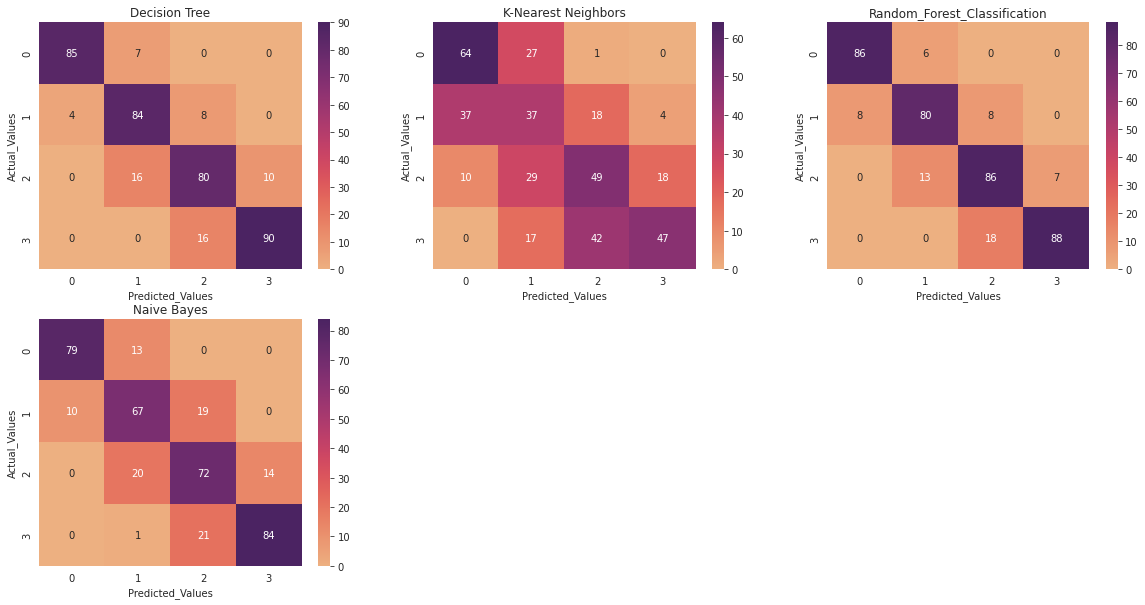

In [ ]:
# Plot the confusion matrix for all applied models
fig= plt.figure(figsize=(20,10))

for i in range(0,len(cm)):
    cm_con=cm[i]
    model=model_list[i]
    sub_fig_title=fig.add_subplot(2,3,i+1).set_title(model)
    plot_map=sns.heatmap(cm_con,annot=True,cmap='flare')
    plot_map.set_xlabel('Predicted_Values')
    plot_map.set_ylabel('Actual_Values')

####  What Model Evalution Results Say !

In [ ]:
# Display evaluation metrics result
result=pd.DataFrame({'Model': model_list,'CV Score': cv_score,'Test Accuracy': test_acc,'Train Accuracy':train_acc,'Test Precision':test_prec,'Train Precision':train_prec,'Test Recall':test_recall,'Train Recall':train_recall,'ROC AUC Score':roc_auc})
result

,Model,CV Score,Test Accuracy,Train Accuracy,Test Precision,Train Precision,Test Recall,Train Recall,ROC AUC Score
0,Decision Tree,0.848785,0.8475,1.000000,0.850420,1.000000,0.8475,1.000000,0.899799
1,K-Nearest Neighbors,0.498530,0.4925,0.706875,0.511893,0.716247,0.4925,0.706875,0.740154
2,Random_Forest_Classification,0.871019,0.8500,1.000000,0.853321,1.000000,0.8500,1.000000,0.970705
3,Naive Bayes,0.799961,0.7550,0.816875,0.760865,0.817445,0.7550,0.816875,0.933301


Out of four models we created, Decision Tree and Random Forest gave the best accuracy scores. However, cross validation score was better for Random forest and hence we have decided to go with Random forest and perform Hyperparameter Tuning.

---------------------------------------------------------------------------------

# 6. Hyperparameter Tuning
We have a model which can predict price range values. Now, hyperparameter optimization is required to get the most out of our machine learning model.Typically, it is challenging to know what values to use for the hyperparameters of a given algorithm on a given dataset, therefore it is common to use grid search strategy for different hyperparameter values.

In [ ]:
# Import GridSearch Module
from sklearn.model_selection import GridSearchCV

# Define parameters for tunning
tree_para = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
# Apply Grid Search
grid = GridSearchCV(RandomForestClassifier(), tree_para, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500)


In [ ]:
# Taking predictions
grid_predictions = grid.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        92
           1       0.80      0.81      0.80        96
           2       0.77      0.81      0.79       106
           3       0.95      0.85      0.90       106

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



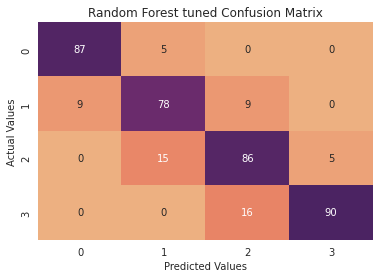


Random Forest tuned Accuracy Score:  0.8525


In [ ]:
# Evaluating the model
cm_rfc=my_confusion_matrix(y_test, grid_predictions, 'Random Forest tuned Confusion Matrix')
print('\nRandom Forest tuned Accuracy Score: ',accuracy_score(y_test,grid_predictions))

In [ ]:
# Creating the dataframe of various scores of various models
model_validation1 = {'Model': ['Random Forest tuned'], 
                    'Accuracy Score':[round(accuracy_score(y_test,grid_predictions),3)]}
model_validate1 = pd.DataFrame(model_validation1)
model_validate1

,Model,Accuracy Score
0,Random Forest tuned,0.852


Well we have optimized our model by almost 1%. Atleast, we have got the best from our current model.

---------------------------------------------------------------------------------

## Important Features
Let's see which are the important feature we got from our model.

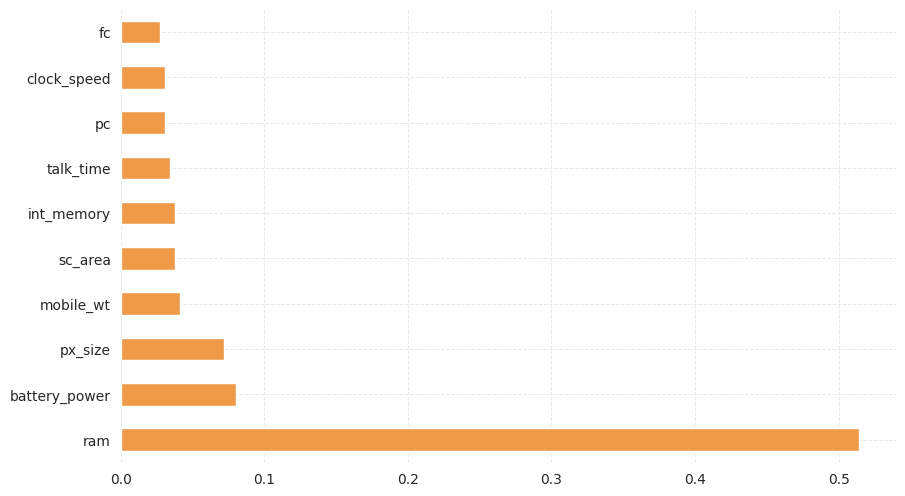

In [ ]:
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train, y_train)                                                    # Model Fitting
y_pred = rf_clf.predict(X_test) 


X1=df[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 
      'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
      'n_cores', 'pc', 'px_size', 'ram', 'sc_area', 'talk_time']]

plt.figure(figsize=(10,6), dpi=100)
(pd.Series(rf_clf.feature_importances_,index=X1.columns).nlargest(10).
 plot(kind='barh',color='#EE9A49'))

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

As we can see the RAM feature is most important feature among all other features which impacts price range very much.

---------------------------------------------------------------------------------

# CONCLUSION

We have reached to the conclusion of our excercise !!

We started this project with the intention to identify the useful variabes/factors which drives phone price and to build a predictive model which can give phone price range depending on its feature. For this,we performed exploratory data analysis on our data after cleaning and making it easy to analyse. This analysis helped us to identify variables which directly impacts Mobile Phone Prices. We found that'RAM' of a phone linearly affects the phone prices. Other variables like battery life and Px_size also shows linearity (upto  extent only) with the phone prices. We found that most very high cost phones have low handset weight, high Internal Memory, high pixel and screen size. 
Our next job was to make a price range predictive model. For this, we processed our data,splitted it for training and testing and finally applied four different models.Both Random Forest and Decision tree classifiers gave some good accuracy scores, howevery on cross validation scores Randome Forest performed much better. This gave us confidence to perform hyperparameter tuning on our Random Forest model. Finally we optimized our mode, which increased the accuracy score of our model to 0.86,which is pretty decent.

With this we achieved our objectives of the project.